In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import k_diffusion as K
import matplotlib.pyplot as plt

In [15]:
def plot_from_config(config):
    sample_density = K.config.make_sample_density(config)
    sigmas = sample_density([10000])
    _ = plt.hist(sigmas, bins=100)

torch.Size([10000])


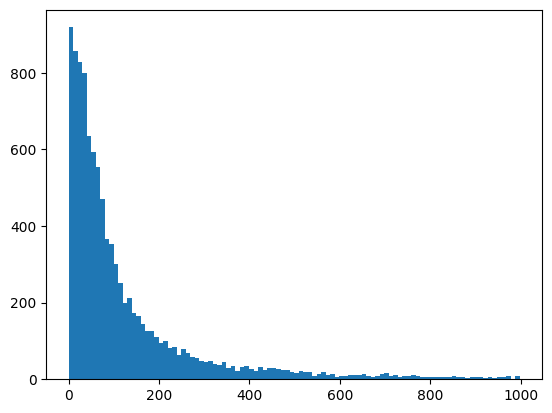

In [27]:
config = { 
    "input_size": 512,
    "loss_config": "vanilla",
    "loss_weighting": "soft-min-snr",
    "sigma_data": 70.907074,
    "sigma_min": 1e-2,
    "sigma_max": 1,
    "normalize_latent_by": "none",
    "sigma_sample_density": {
        "type": "v-diffusion"
    },
}

sample_density = K.config.make_sample_density(config)
sigmas = sample_density([10000])
print(sigmas.shape)
_ = plt.hist(sigmas, bins=100)